In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import os

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import os
import csv
from matplotlib import pyplot as plt
import scipy.stats as st

In [2]:
# Best S&P500 ETF to show performance of the S&P500
SPY = pdr.get_data_yahoo('SPY', start='2012-01-01', end='2022-01-01')
# Best NASDAQ ETF to show performance of the NASDAQ
QQQ = pdr.get_data_yahoo('QQQ', start='2012-01-01', end='2022-01-01')
# Best DOW ETF to show performance of the DOW
VTI = pdr.get_data_yahoo('VTI', start='2012-01-01', end='2022-01-01')

# Grabbing a list of all SECTOR ETFS from https://etfdb.com/etfs/sector/ to keep it Standardized.
# Technology, Healthcare, Energy, Real Estate, Materials, Financials, Industrials, Utilities, Consumer Staples, Consumer Discretionary.
# Are the main 11 Sectors in the US Economy.

# QQQ is already the Technology NASDAQ best fit.
# Import the XLK (Biggest Technology ETF Fund)
XLK = pdr.get_data_yahoo('XLK', start='2012-01-01', end='2022-01-01')
# XLY (Consumer Cyclical/Consumer Discretionary ETF)
XLY = pdr.get_data_yahoo('XLY', start='2012-01-01', end='2022-01-01')
# XLP (Consumer Defensive/Consumer Staples ETF)
XLP = pdr.get_data_yahoo('XLP', start='2012-01-01', end='2022-01-01')
# XLV (Healthcare ETF)
XLV = pdr.get_data_yahoo('XLV', start='2012-01-01', end='2022-01-01')
# XLI (Industrials ETF)
XLI = pdr.get_data_yahoo('XLI', start='2012-01-01', end='2022-01-01')
# XLF (Financials ETF)
XLF = pdr.get_data_yahoo('XLF', start='2012-01-01', end='2022-01-01')
# VNQ (Real Estate ETF)
VNQ = pdr.get_data_yahoo('VNQ', start='2012-01-01', end='2022-01-01')
# XLE (Energy ETF)
XLE = pdr.get_data_yahoo('XLE', start='2012-01-01', end='2022-01-01')
# XLU (Utilities ETF)
XLU = pdr.get_data_yahoo('XLU', start='2012-01-01', end='2022-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Not all Data is equal length. Might want to look for other ETFs to get longer span of Index.
# QQQ.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\QQQ.csv', index=False)
# SPY.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\SPY.csv', index=False)
# VTI.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\VTI.csv', index=False)
# XLK.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLK.csv', index=False)
# XLC.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLC.csv', index=False)
# XLY.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLY.csv', index=False)
# XLP.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLP.csv', index=False)
# XLV.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLV.csv', index=False)
# XLI.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLI.csv', index=False)
# XLF.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLF.csv', index=False)
# VNQ.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\VNQ.csv', index=False)
# XLE.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLE.csv', index=False)
# XLU.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLU.csv', index=False)

# folder = 'data'
# if not os.path.exists(folder):
#     os.makedirs(folder)

# files = ['QQQ', 'SPY', 'VTI', 'XLK', 'XLC', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU']
# file_paths = [f'{folder}/{file}.csv' for file in files]

# for file, file_path in zip(files, file_paths):
#     locals()[file].to_csv(file_path, index=True)

In [4]:
XLK.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,25.870001,26.020000,25.790001,25.809999,21.923479,26839900
2012-01-04 00:00:00-05:00,25.799999,25.930000,25.660000,25.879999,21.982939,4744300
2012-01-05 00:00:00-05:00,25.850000,26.010000,25.730000,25.959999,22.050890,6756900
2012-01-06 00:00:00-05:00,25.980000,26.030001,25.850000,25.969999,22.059385,4989200
2012-01-09 00:00:00-05:00,26.059999,26.080000,25.860001,25.930000,22.025412,4086600


In [5]:
XLK.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27 00:00:00-05:00,173.630005,176.690002,173.589996,176.649994,174.931717,6633300
2021-12-28 00:00:00-05:00,176.979996,177.039993,175.289993,175.729996,174.020676,5711100
2021-12-29 00:00:00-05:00,175.789993,176.589996,174.970001,175.880005,174.169235,4843900
2021-12-30 00:00:00-05:00,175.949997,176.539993,174.509995,174.720001,173.020493,5263200
2021-12-31 00:00:00-05:00,174.550003,174.970001,173.789993,173.869995,172.178772,5121500


In [6]:
# XLV.head()

In [7]:
# Show that that DataFrame SPY imported OK
SPY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,127.760002,128.380005,127.430000,127.500000,103.596207,193697900
2012-01-04 00:00:00-05:00,127.199997,127.809998,126.709999,127.699997,103.758713,127186500
2012-01-05 00:00:00-05:00,127.010002,128.229996,126.430000,128.039993,104.034935,173895000
2012-01-06 00:00:00-05:00,128.199997,128.220001,127.290001,127.709999,103.766823,148050000
2012-01-09 00:00:00-05:00,128.000000,128.179993,127.410004,128.020004,104.018700,99530200


In [8]:
# SPY.tail()

In [9]:
# Show that that DataFrame QQQ imported OK
# QQQ.head()

In [10]:
# QQQ.tail()

In [11]:
# Show that that DataFrame VTI imported OK
VTI.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269047,2230400
2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293549,1647400
2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530437,1146300
2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407921,1640000
2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530437,1978900


In [12]:
# VTI.tail()

In [13]:
#QQQ', 'SPY', 'VTI', 'XLK', 'XLC', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU'

VTI = VTI.reset_index()
QQQ = QQQ.reset_index()
SPY = SPY.reset_index()
XLK = XLK.reset_index()
XLY = XLY.reset_index()
XLP = XLP.reset_index()
XLV = XLV.reset_index()
XLI = XLI.reset_index()
XLF = XLF.reset_index()
VNQ = VNQ.reset_index()
XLE = XLE.reset_index()
XLU = XLU.reset_index()


In [14]:
VTI["Ticker"] = "VTI"
QQQ["Ticker"] = "QQQ"
SPY["Ticker"] = "SPY"
XLK["Ticker"] = "XLK"
XLY["Ticker"] = "XLY"
XLP["Ticker"] = "XLP"
XLV["Ticker"] = "XLV"
XLI["Ticker"] = "XLI"
XLF["Ticker"] = "XLF"
VNQ["Ticker"] = "VNQ"
XLE["Ticker"] = "XLE"
XLU["Ticker"] = "XLU"

VTI.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269047,2230400,VTI
1,2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293549,1647400,VTI
2,2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530437,1146300,VTI
3,2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407921,1640000,VTI
4,2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530437,1978900,VTI


In [15]:
VTI.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
2512,2021-12-27 00:00:00-05:00,240.479996,242.960007,240.339996,242.960007,239.067947,4395100,VTI
2513,2021-12-28 00:00:00-05:00,243.059998,243.779999,242.039993,242.460007,238.575974,3960900,VTI
2514,2021-12-29 00:00:00-05:00,242.550003,243.160004,241.710007,242.600006,238.713699,3044300,VTI
2515,2021-12-30 00:00:00-05:00,243.110001,243.690002,242.000000,242.210007,238.329971,4501500,VTI
2516,2021-12-31 00:00:00-05:00,242.089996,242.690002,241.440002,241.440002,237.572311,3499900,VTI


In [16]:
VTI["DayChange"] = int("0")
VTI["CumulativeChange"] = int("0")
QQQ["DayChange"] = int("0")
QQQ["CumulativeChange"] = int("0")
SPY["DayChange"] = int("0")
SPY["CumulativeChange"] = int("0")
XLK["DayChange"] = int("0")
XLK["CumulativeChange"] = int("0")
XLY["DayChange"] = int("0")
XLY["CumulativeChange"] = int("0")
XLP["DayChange"] = int("0")
XLP["CumulativeChange"] = int("0")
XLV["DayChange"] = int("0")
XLV["CumulativeChange"] = int("0")
XLI["DayChange"] = int("0")
XLI["CumulativeChange"] = int("0")
XLF["DayChange"] = int("0")
XLF["CumulativeChange"] = int("0")
VNQ["DayChange"] = int("0")
VNQ["CumulativeChange"] = int("0")
XLE["DayChange"] = int("0")
XLE["CumulativeChange"] = int("0")
XLU["DayChange"] = int("0")
XLU["CumulativeChange"] = int("0")

In [17]:
#checking DTypes
VTI.dtypes

Date                datetime64[ns, America/New_York]
Open                                         float64
High                                         float64
Low                                          float64
Close                                        float64
Adj Close                                    float64
Volume                                         int64
Ticker                                        object
DayChange                                      int64
CumulativeChange                               int64
dtype: object

In [18]:
count = VTI["Open"].count()
print(count)
count.dtype

2517


dtype('int64')

In [19]:
# Run through all tickers to update percent change field
changing = 0
tickers1 = [QQQ, SPY, VTI, XLK, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU]
for x in tickers1:
    x["DayChange"] = x.groupby("Ticker").Close.pct_change()*100
    x["CumulativeChange"] = x.groupby("Ticker").DayChange.cumsum()

In [20]:
VTI.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
0,2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269047,2230400,VTI,NaN,NaN
1,2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293549,1647400,VTI,0.046003,0.046003
2,2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530437,1146300,VTI,0.444514,0.490517
3,2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407921,1640000,VTI,-0.228905,0.261612
4,2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530437,1978900,VTI,0.229430,0.491043


In [21]:
VTI.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
2512,2021-12-27 00:00:00-05:00,240.479996,242.960007,240.339996,242.960007,239.067947,4395100,VTI,0.951514,145.136778
2513,2021-12-28 00:00:00-05:00,243.059998,243.779999,242.039993,242.460007,238.575974,3960900,VTI,-0.205795,144.930983
2514,2021-12-29 00:00:00-05:00,242.550003,243.160004,241.710007,242.600006,238.713699,3044300,VTI,0.057741,144.988724
2515,2021-12-30 00:00:00-05:00,243.110001,243.690002,242.000000,242.210007,238.329971,4501500,VTI,-0.160758,144.827966
2516,2021-12-31 00:00:00-05:00,242.089996,242.690002,241.440002,241.440002,237.572311,3499900,VTI,-0.317908,144.510058


In [22]:
QQQ.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
0,2012-01-03 00:00:00-05:00,56.910000,57.189999,56.750000,56.900002,51.284267,39514100,QQQ,NaN,NaN
1,2012-01-04 00:00:00-05:00,56.810001,57.220001,56.560001,57.139999,51.500584,29403400,QQQ,0.421789,0.421789
2,2012-01-05 00:00:00-05:00,57.020000,57.660000,56.799999,57.610001,51.924206,41260600,QQQ,0.822543,1.244332
3,2012-01-06 00:00:00-05:00,57.619999,57.939999,57.400002,57.810001,52.104465,46325200,QQQ,0.347163,1.591495
4,2012-01-09 00:00:00-05:00,57.959999,57.980000,57.430000,57.619999,51.933216,39195500,QQQ,-0.328667,1.262828


In [23]:
#Check to see if the data merged.
data = pd.concat([SPY, QQQ, VTI, XLK, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU])
data.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
2406,2021-07-27 00:00:00-04:00,154.250000,154.300003,151.050003,152.979996,150.940430,9044900,XLK,-0.945355,197.535912
726,2014-11-20 00:00:00-05:00,41.259998,41.610001,41.180000,41.610001,37.118996,4897400,XLK,0.507244,50.191600
548,2014-03-11 00:00:00-04:00,39.939999,40.000000,39.599998,39.779999,29.536448,7921000,XLU,-0.275760,13.174036
2207,2020-10-09 00:00:00-04:00,31.570000,31.650000,30.740000,30.790001,27.840128,25517900,XLE,-1.597955,-52.022274
1437,2017-09-19 00:00:00-04:00,66.260002,66.489998,66.129997,66.389999,51.513229,10504300,XLE,0.408343,4.389908
68,2012-04-11 00:00:00-04:00,70.370003,70.500000,70.099998,70.180000,57.574863,2120500,VTI,0.833336,7.504274
1037,2016-02-18 00:00:00-05:00,51.480000,51.610001,51.230000,51.419998,45.089611,9587800,XLI,-0.058314,44.532032
1288,2017-02-15 00:00:00-05:00,86.180000,86.800003,86.029999,86.769997,81.329330,4754900,XLY,0.521312,84.177550
1171,2016-08-29 00:00:00-04:00,58.669998,59.090000,58.669998,59.080002,52.359489,7628200,XLI,0.715994,58.900146
141,2012-07-25 00:00:00-04:00,11.616572,11.657189,11.527214,11.592201,9.486242,55276209,XLF,0.351614,7.762070


In [24]:
# Test of how to get daily percent change
# data['Change %'] = data.groupby('Ticker').Close.pct_change()

In [25]:
#Test that we have the correct amount of Unique tickers added to the DataFrame
Ticker_count = len(data.groupby("Ticker").nunique())
print(Ticker_count)

12


In [26]:
data.value_counts

<bound method DataFrame.value_counts of                           Date        Open        High         Low  \
0    2012-01-03 00:00:00-05:00  127.760002  128.380005  127.430000   
1    2012-01-04 00:00:00-05:00  127.199997  127.809998  126.709999   
2    2012-01-05 00:00:00-05:00  127.010002  128.229996  126.430000   
3    2012-01-06 00:00:00-05:00  128.199997  128.220001  127.290001   
4    2012-01-09 00:00:00-05:00  128.000000  128.179993  127.410004   
...                        ...         ...         ...         ...   
2512 2021-12-27 00:00:00-05:00   69.750000   70.059998   69.540001   
2513 2021-12-28 00:00:00-05:00   70.160004   70.709999   70.110001   
2514 2021-12-29 00:00:00-05:00   70.769997   71.180000   70.650002   
2515 2021-12-30 00:00:00-05:00   71.260002   71.400002   70.809998   
2516 2021-12-31 00:00:00-05:00   71.180000   71.830002   71.040001   

           Close   Adj Close     Volume Ticker  DayChange  CumulativeChange  
0     127.500000  103.596207  193697900  

In [27]:
#Describe the Data to see what pops out if anything.
data.describe()

,Open,High,Low,Close,Adj Close,Volume,DayChange,CumulativeChange
count,30204.000000,30204.000000,30204.000000,30204.000000,30204.000000,3.020400e+04,30192.000000,30192.000000
mean,91.909244,92.442872,91.324879,91.922110,83.007658,2.360991e+07,0.053352,62.252498
std,70.938949,71.310774,70.515301,70.951362,69.416935,3.350156e+07,1.198535,44.591879
min,10.706742,10.844842,10.658002,10.804224,8.771104,5.524000e+05,-20.141180,-86.914252
25%,49.847499,50.169998,49.509998,49.830002,42.269088,5.554200e+06,-0.440806,28.847307
50%,71.220001,71.645000,70.769997,71.239998,60.642250,1.055640e+07,0.083279,55.331253
75%,105.220001,105.860001,104.652502,105.260002,98.596527,2.551400e+07,0.614291,88.141822
max,477.929993,479.000000,476.059998,477.480011,469.857361,5.072443e+08,16.037339,214.274135


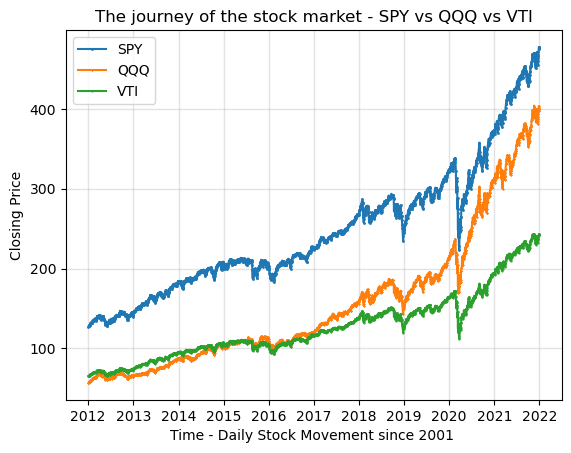

In [28]:
#Plot out the initial info we have to see what we are working with.
SPY_line = data.loc[data["Ticker"] == "SPY"]
QQQ_line = data.loc[data["Ticker"] == "QQQ"]
VTI_line = data.loc[data["Ticker"] == "VTI"]
plt.plot(SPY_line["Date"], SPY_line["Close"], marker = 'o', markersize=1)
plt.plot(QQQ_line["Date"], QQQ_line["Close"], marker = 'x', markersize=1)
plt.plot(VTI_line["Date"], VTI_line["Close"], marker = 'v', markersize=1)
plt.xlabel("Time - Daily Stock Movement since 2001 ")
plt.ylabel("Closing Price")
plt.title(f"The journey of the stock market - SPY vs QQQ vs VTI")
plt.legend(["SPY", "QQQ", "VTI"], loc="best")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
plt.show()

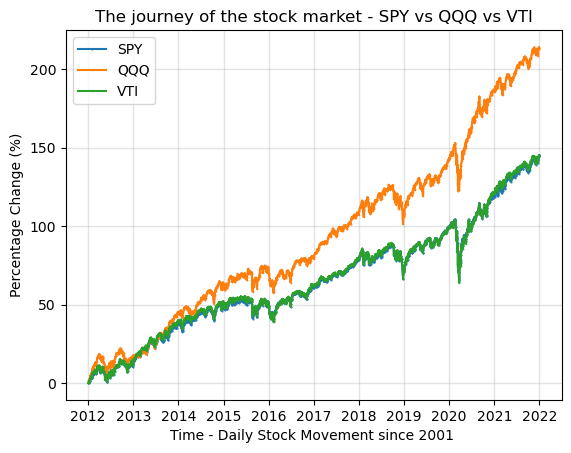

In [29]:
#Plot out the new Cumulative change we calcuated into a Graph that starts at the same point.
SPY_line = data.loc[data["Ticker"] == "SPY"]
QQQ_line = data.loc[data["Ticker"] == "QQQ"]
VTI_line = data.loc[data["Ticker"] == "VTI"]
plt.plot(SPY_line["Date"], SPY_line["CumulativeChange"], marker = 'o', markersize=0.5)
plt.plot(QQQ_line["Date"], QQQ_line["CumulativeChange"], marker = 'x', markersize=0.5)
plt.plot(VTI_line["Date"], VTI_line["CumulativeChange"], marker = 'v', markersize=0.5)
plt.xlabel("Time - Daily Stock Movement since 2001 ")
plt.ylabel("Percentage Change (%)")
plt.title(f"The journey of the stock market - SPY vs QQQ vs VTI")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
plt.legend(["SPY", "QQQ", "VTI"], loc="best")
plt.show()

The takeaway from merging the graphs by cumulative change is that we noticed that VTI and SPY both track almost the identical stocks since the lines are identical to one another.

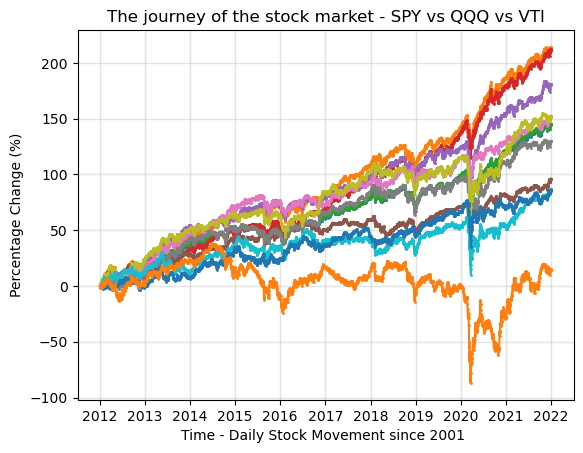

In [30]:
# Starting graphing cumulative change line for all ETFs by different sectors since 2012/01/01
# SPY, QQQ, VTI, XLK, XLC, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU
SPY_line = data.loc[data["Ticker"] == "SPY"]
QQQ_line = data.loc[data["Ticker"] == "QQQ"]
VTI_line = data.loc[data["Ticker"] == "VTI"]
XLK_line = data.loc[data["Ticker"] == "XLK"]
XLY_line = data.loc[data["Ticker"] == "XLY"]
XLP_line = data.loc[data["Ticker"] == "XLP"]
XLV_line = data.loc[data["Ticker"] == "XLV"]
XLI_line = data.loc[data["Ticker"] == "XLI"]
XLF_line = data.loc[data["Ticker"] == "XLF"]
VNQ_line = data.loc[data["Ticker"] == "VNQ"]
XLU_line = data.loc[data["Ticker"] == "XLU"]
XLE_line = data.loc[data["Ticker"] == "XLE"]
plt.plot(SPY_line["Date"], SPY_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(QQQ_line["Date"], QQQ_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(VTI_line["Date"], VTI_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLK_line["Date"], XLK_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLY_line["Date"], XLY_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLP_line["Date"], XLP_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLV_line["Date"], XLV_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLI_line["Date"], XLI_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLF_line["Date"], XLF_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(VNQ_line["Date"], VNQ_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLU_line["Date"], XLU_line["CumulativeChange"], marker = 'o', markersize=1)
plt.plot(XLE_line["Date"], XLE_line["CumulativeChange"], marker = 'o', markersize=1)
plt.xlabel("Time - Daily Stock Movement since 2001 ")
plt.ylabel("Percentage Change (%)")
plt.title(f"The journey of the stock market - SPY vs QQQ vs VTI")
plt.grid(linestyle='-', linewidth=1, alpha = 0.35)
# plt.legend(["SPY", "QQQ", "VTI", "XLK", "XLC", "XLY" ,"XLP", "XLV", "XLI", "XLF", "VNQ", "XLU", "XLE"], loc="best")
plt.show()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30204 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype                           
---  ------            --------------  -----                           
 0   Date              30204 non-null  datetime64[ns, America/New_York]
 1   Open              30204 non-null  float64                         
 2   High              30204 non-null  float64                         
 3   Low               30204 non-null  float64                         
 4   Close             30204 non-null  float64                         
 5   Adj Close         30204 non-null  float64                         
 6   Volume            30204 non-null  int64                           
 7   Ticker            30204 non-null  object                          
 8   DayChange         30192 non-null  float64                         
 9   CumulativeChange  30192 non-null  float64                         
dtypes: datetime64[ns, Ameri

In [32]:
#Seems like we have all of the data points matching one another meaning that our initial 3 ETFs representing the Stock Market, DOW, NASDAQ and S&P500 are most likely in line with one another.
data.count()

Date                30204
Open                30204
High                30204
Low                 30204
Close               30204
Adj Close           30204
Volume              30204
Ticker              30204
DayChange           30192
CumulativeChange    30192
dtype: int64

In [33]:
count = data.groupby("Ticker")
count1 = count["Volume"].sum()
count1

Ticker
QQQ     92844825600
SPY    255384731400
VNQ     10915268600
VTI      7376731300
XLE     45659010000
XLF    147718597737
XLI     29505512200
XLK     26103890200
XLP     26990486000
XLU     33853130900
XLV     22985373200
XLY     13776206500
Name: Volume, dtype: int64

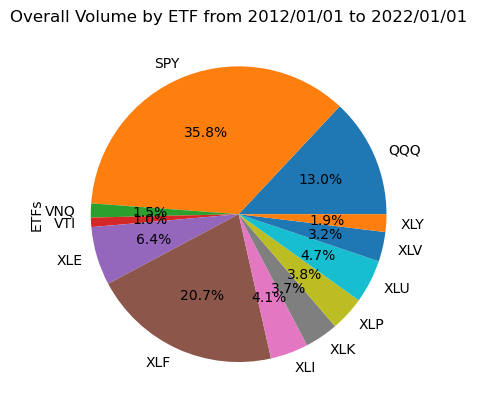

In [35]:
label = count1.index.values
plt.pie(count1, labels=label, autopct="%1.1f%%", startangle=0, shadow=False)
plt.title("Overall Volume by ETF from 2012/01/01 to 2022/01/01")
plt.ylabel("ETFs")
plt.show()

In [ ]:
#Isaac
